In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dados.csv')

In [31]:
df.head()

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93
2,Recursão,Blake Crouch,9.788551e+12,8551005375,2020,320,português,Intrínseca,4.4,2,618,22,2,6,295,2,E se um dia memórias vívidas de coisas que nun...,Ficção / Ficção científica / Literatura Estran...,21,79
3,"M, o Filho do Século",Antonio Scurati,9.788551e+12,855100607X,2020,816,português,Intrínseca,4.6,60,12,1,0,951,49,55,"O romance M, o Filho do Século conta em trama ...","Biografia, Autobiografia, Memórias / História ...",37,63
4,Oblivion Song: Entre Dois Mundos,Robert Kirkman,9.788551e+12,8551006258,2020,136,português,Intrínseca,4.1,166,16,0,0,376,6,184,Mestre em traçar universos distópicos permeado...,"Ficção / HQ, comics, mangá / Literatura Estran...",44,56


### Pre processamento dos dados

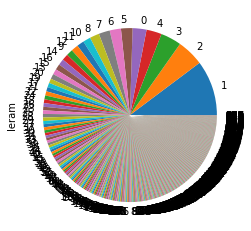

In [64]:
df['leram'].value_counts().plot(kind='pie');


In [34]:
df[df['rating'] <= 0.1]['rating'].value_counts()

0.0    400
Name: rating, dtype: int64

Existem 400 livros com número o nota 0, isso é ocasionado por eles não serem lidos ou se são de fato a média das avaliações?

0    264
1     94
2     24
3     17
7      1
Name: leram, dtype: int64


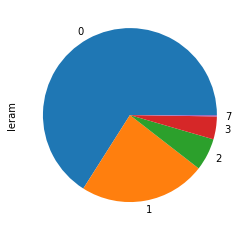

In [45]:
print(df[df['rating'] <= 0.1]['leram'].value_counts())

df[df['rating'] <= 0.1]['leram'].value_counts().plot(kind='pie');

In [60]:
df[(df['leram'] == 7) & (df['rating'] == 0)]

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
5369,Imortalidade Diária,Deepak Chopra,9.788533e+12,8532524230,2009,202,português,Rocco,0.0,0,0,0,0,21,2,7,"Há milhares de anos, os seres humanos se pergu...",,31,69


Bem, a maioria dos livros não foram lidos por leitores do skoob, e alguns tem poucos leitores, e boa parte foram lidos por poucas pessoas, o livro que mais teve leitores que não o avaliaram foi o [Imortalidade Diária](https://www.skoob.com.br/imortalidade-diaria-97015ed107373.html)



Qual é o intervalo das notas de avaliações?

In [74]:
df['rating'].value_counts(ascending=True)

7.0        1
10.0       1
1.7        1
5.5        1
6.5        1
5.8        1
5.3        1
1.8        3
1.3        3
1.5        4
2.1        4
6.0        5
2.4        6
2.2        7
1.0        7
4.9       12
2.3       16
2.6       18
2.0       27
2.5       31
2.7       34
2.8       63
2.9       66
4.8       86
4.7      136
3.1      165
3.2      175
5.0      220
3.0      248
4.6      264
3.3      348
3.4      398
0.0      400
4.5      469
3.5      582
4.4      631
3.6      641
3.7      708
3.9      913
4.3      979
3.8      985
4.2     1023
4.1     1060
4.0     1231
Name: rating, dtype: int64

Existem alguns livros que tem nota maior que 5, o que é muito estranho devido as notas variam entre 1 e 5

In [78]:
df[df['rating'] > 5.1]

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
297,Refúgio no sábado,Míriam Leitão,NaN,NaN,2018,288,português,Intrínseca,6.0,2,0,0,0,10,3,1,NaN,NaN,18,82
1357,Caligrafia para crianças: letra cursiva,Crystal Radke,9.786556e+12,6555640049,2020,80,português,Editora,7.0,2,0,2,2,120,3,5,ATIVIDADES DIVERTIDAS PARA PRATICAR A CALIGRAF...,"Boa diversão! "" - Iberê Thenório e Mari Fulfar...",20,80
4203,Cola,Irvine Welsh,NaN,NaN,2019,320,português,Rocco,6.0,4,1,2,0,24,3,1,A história de quatro garotos criados entre os ...,Ficção,35,65
4405,Dicas da Imensidão,Margaret Atwood,NaN,NaN,2017,242,português,Rocco,6.5,2,0,0,0,5,1,2,"Ela é ativa nas redes sociais, onde frequentem...",Literatura Estrangeira,10,90
8001,Encontre Deus Na Cabana,Randal Rauser,9.788542e+12,8542210549,2017,300,português,Pórtico,5.8,2,1,1,0,15,1,1,Entenda a verdadeira mensagem de A cabana A fi...,Literatura Estrangeira,32,68
8786,Star Wars - Figuras de Chumbo - 36,Lucasfilm Ltd.,9.788575e+12,8574797766,2009,20,português,Planeta,5.5,2,0,0,0,0,0,2,Amigo pessoal e homem de confiança de Luke Sky...,,100,0
8807,Star Wars - Figuras de Chumbo - 57,Lucasfilm Ltd.,9.788575e+12,8574797766,2009,20,português,Planeta,6.0,2,0,0,0,0,0,3,"Conhecido por sua extrema crueldade, o Trandos...",,100,0
8880,Star Wars - Figuras de Chumbo - 05,Lucasfilm Ltd.,9.788575e+12,8574797766,2008,20,português,Planeta,6.0,2,0,0,0,0,0,4,O aspecto demoníaco do aprendiz de Darth Sidio...,,100,0
8890,Star Wars - Figuras de Chumbo - 15,Lucasfilm Ltd.,9.788575e+12,8574797766,2008,20,português,Planeta,6.0,2,0,0,0,2,0,3,O pérfido senador e chanceler foi paulatinamen...,,75,25
10380,O Que Eu Vou Ser Quando Crescer (+ Adesivos),Leticia Braga,9.788595e+12,8595084912,2019,32,português,HarperCollins,10.0,1,0,1,0,4,0,3,"""Você já brincou do que vai ser quando crescer...",Que delícia! Esse faz de conta é tão incrível...,9,91


In [79]:
df2 = df[df['rating'] < 5.1]

In [82]:
print(df.shape)
print(df2.shape)

(11975, 20)
(11964, 20)


### Livros com muitas resenhas são mais bem avaliados?

In [22]:
df[df['rating'] <= 5.1]['rating'].value_counts()

4.0    1231
4.1    1060
4.2    1023
3.8     985
4.3     979
3.9     913
3.7     708
3.6     641
4.4     631
3.5     582
4.5     469
0.0     400
3.4     398
3.3     348
4.6     264
3.0     248
5.0     220
3.2     175
3.1     165
4.7     136
4.8      86
2.9      66
2.8      63
2.7      34
2.5      31
2.0      27
2.6      18
2.3      16
4.9      12
1.0       7
2.2       7
2.4       6
2.1       4
1.5       4
1.3       3
1.8       3
1.7       1
Name: rating, dtype: int64

In [16]:
df['rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0.0
1        4.3
2        4.4
3        4.6
4        4.1
        ... 
11970    4.2
11971    4.6
11972    4.0
11973    4.4
11974    4.3
Name: rating, Length: 11975, dtype: float64>

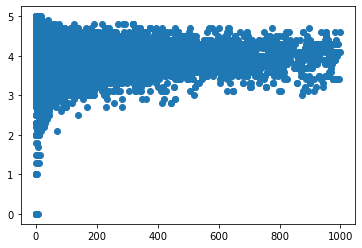

In [25]:

plt.scatter(df[df['rating'] <= 5.1]['leram'], df[df['rating'] <= 5.1]['rating'])#, c=colors, alpha=0.5)
# plt.title('Scatter plot pythonspot.com')
# plt.xlabel('x')
# plt.ylabel('y')
plt.show()